<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR79f0HtmO_rLX5R89c90X6owsEp6_zRRG7LUjr1ToQFx-R6f6I" style="float: left; margin: 20px; height: 100px">

# Web Scraping Indeed

_Author: Alfred Zou_

---

### Introduction
---
In my opinion, the emergence and sudden popularity of the data field is probably caused by a few factors:

**Data has become easier to collect for companies, due to:**
* the creation and popularity of the internet, which has lead to an explosion of data
* the improvement of software systems to track purchases, customers, etc

**Advancements in computing power and software:**
* improvements in computing power, especially GPUs greatly speed up machine learning
* the creation of cloud platforms, where computing power can be easily obtained without businesses needing to physically set up infrastructure 
* improvements in software has made data analysis and machine learning through python packages such as `pandas`, `scikit-learn` and `TensorFlow` much easier to learn and implement

**Realisation of the importance of data:**
* companies such as Facebook and Google have utilised personal data to serve advertisements
* companies such as Spotify and YouTube have developed data driven recommendation systems

Companys have realised the hidden potential of data that need to be analysed by `data analysts` to help drive decision making or used to make a prediction through a machine learning model created by a `data scientist`. Of course `data engineers` are needed to build the data pipeline for `data analyst` and `data scientists` to use.

### Aim
---
Due to the relatively new nature of the data field, data job positions haven't been concretely defined. Each company will have their own job titles with different and possible misconception of role requirements. For example, a HR person writing a job advertisement may confuse a `data scientist` with a `data analyst`. It is likely that as the profession becomes more mature, more specific date roles are introduced.

I believe that there are three predominate data roles: `data analyst`, `data engineer` and `data scientist`

My aim is to determine the most relevant skills requested in job advertisements for each of these three job titles.

### Limitations
---
* This analysis only looks at the Sydney market, generalising outside of the Sydney market will invalidate this model
* This analysis only looks at job postings on Indeed
* This analysis assumes three types of data roles, there maybe more. For example, the position as a data steward
    * Note: performing an unspervised clustering, may determine how many data roles there actually are
* This analysis does not determine the most relevant skills required for each of the three job titles, instead it determines the most releveant skills asked by job advertisements
* There is probably a disconnect between the skills of those in the position and the skills being requested by job advertisements
    * To truly determine the skills of those in the position, collecting data from those in the data field through survey or scraping LinkedIn data, would probably be a more effective mtheod

## Job URL Scrapping
---

Here are the packages I will use:
* `pandas` for DataFrames and `numpy` for maths operations
* `requests.get()` to crawl websites and `Selector().xpath` to parse the html
* `time.sleep()` to implement a delay during scraping to prevent errors
* `time`
* `re` (regex) for filtering and cleaning DataFrame

In [1]:
# Import packages
import pandas as pd
import numpy as np
import requests
from scrapy.selector import Selector
from IPython.display import clear_output
import time
import re

I'll iterate over these search terms:
* `search_titles` means that all the words in the string must be in the job title
* not all indeed job listings explicitly include the `job_type` and `salary_range`
* However, if we search the `job_type` as temporary and a listing pop ups. Even if it is not explicity said, we can attribute that job listing is a temporary job 

In [2]:
search_titles = ["data analyst","data analytics","business analyst", "business intelligence", "data scientist","data science","data engineer","database engineer","machine learning"]
job_type = ['fulltime','permanent','contract','temporary','parttime']
salary_range = [[str(z),str(z+10000)] for z in range(50000,200001,10000)]

In [3]:


'''
The aim is to iterate over search titles, job types and salary ranges to extract all the job URLs,
For each job URL, record the hidden job type and salary ranges 
'''

# Initialise empty list related to search term
job_URL_list = []
search_title_list = []
job_type_list = []
salary_range_list = []

# Start timer
start = time.time()

# Iterating over search titles, job types and salary ranges..
for stitle in search_titles:
    for jtype in job_type:
        for srange in salary_range:
            
            # Crawl to the first page of the search results
            path = f"https://au.indeed.com/jobs?as_ttl={stitle.replace(' ','+')}&jt={jtype}&sr=directhire&salary=${'-$'.join(srange)}&radius=0&l=Australia&fromage=any&limit=50&sort=&psf=advsrch&from=advancedsearch"
            req = requests.get(path)
            
            # Extract the URLs for extra pages 
            extra_page_URL_list = Selector(text=req.text).xpath('//div[@class="pagination"]/a/@href').getall()
            extra_page_URL_list = extra_page_URL_list[:-1] # drop the last URL, due to next button URL
            extra_page_URL_list = ['http://au.indeed.com' + i for i in extra_page_URL_list]            
                     
            print(f'Page 1 of {len(extra_page_URL_list)+1}:', end = '\n\n')
            
            print(f'Searching for all jobs titles that include: {stitle}',end = '\n')
            print(f'Of job type: {jtype}',end = '\n')
            print(f'In the salary range of: {"-".join(srange)}',end = '\n\n')
            
            # Extract all URLs for all the job listings in page 1
            page_job_URL_list = Selector(text=req.text).xpath('//a[@data-tn-element="jobTitle"]/@href').getall()
            print(f"{len(page_job_URL_list)} job URLs extracted from Page 1", end = '\n\n')
            
            # Append all job URLs
            # Append search titles, job types and salary ranges to match number of job URLs
            job_URL_list += page_job_URL_list
            for i in range(len(page_job_URL_list)):
                search_title_list.append(stitle)
                job_type_list.append(jtype)
                salary_range_list.append(srange)
            
            # To make sure all list lengths are equal
            print('Job URL count:',len(job_URL_list))
            print('Search title count:',len(search_title_list))
            print('Job type count:',len(job_type_list))
            print('Salary range count:',len(salary_range_list))
            clear_output(wait=True)
            
            time.sleep(0.1)
            
            # Iterate through all the additional pages
            page_count = 1
            for extra_page in extra_page_URL_list:
                page_count += 1
                
                # Crawl to extra page
                req = requests.get(extra_page)
                print(f'Page {page_count} of {len(extra_page_URL_list)+1}:', end = '\n\n')

                print(f'Searching for all jobs titles that include: {stitle}',end = '\n')
                print(f'Of job type: {jtype}',end = '\n')
                print(f'In the salary range of: {"-".join(srange)}',end = '\n\n')

                # Extract all URLs for all the job listings in extra pages
                page_job_URL_list = Selector(text=req.text).xpath('//a[@data-tn-element="jobTitle"]/@href').getall()
                print(f"{len(page_job_URL_list)} job URLs extracted from Page {page_count}", end = '\n\n')

                # Append all job URLs
                # Append search titles, job types and salary ranges to match number of job URLs
                job_URL_list += page_job_URL_list
                for i in range(len(page_job_URL_list)):
                    search_title_list.append(stitle)
                    job_type_list.append(jtype)
                    salary_range_list.append(srange)

                # To make sure all list lengths are equal
                print('Job URL count:',len(job_URL_list))
                print('Search title count:',len(search_title_list))
                print('Job type count:',len(job_type_list))
                print('Salary range count:',len(salary_range_list))
                clear_output(wait=True) 
                
                time.sleep(0.1)
                             
job_URL_list = ['http://au.indeed.com' + i for i in job_URL_list]
print(f"Job URL scrapping completed: {len(job_URL_list)}", end = '\n')

end = time.time()


Job URL scrapping completed: 636
Wall time: 7min 10s


In [952]:
# Writing to df
search = pd.DataFrame({"search_title": search_title_list,"job_type": job_type_list,"salary_range": salary_range_list,"job_url_search": job_URL_list})
search.head()

,search_title,job_type,salary_range,job_url_search
0,data analyst,fulltime,"[50000, 60000]",http://au.indeed.com/rc/clk?jk=ef67be88ae30a70...
1,data analyst,fulltime,"[50000, 60000]",http://au.indeed.com/company/Aginic/jobs/Data-...
2,data analyst,fulltime,"[50000, 60000]",http://au.indeed.com/company/Manton-Capital-Pa...
3,data analyst,fulltime,"[50000, 60000]",http://au.indeed.com/rc/clk?jk=fcae1e65600b09e...
4,data analyst,fulltime,"[60000, 70000]",http://au.indeed.com/rc/clk?jk=1589ecba611844b...


In [953]:
search.shape

(743, 4)

In [954]:
# # Writing to csv
# search.to_csv('Data\search.csv',index=False)

### Job Scrapping
---

In [1761]:
%%time

'''
For each job URL, scrape the job details
'''

# Initialising job detail lists
job_url_result_list = []
job_title_list = []
company_list = []
location_list = []
true_salary_list = []
job_description_list = []

job_count = 0
for i in job_URL_list:
    job_count += 1

    # Crawl to job URL
    req = requests.get(i)
    print(f'Job {job_count} of {len(job_URL_list)}:', end = '\n\n')
        
    # Extracting job details
    job_title = Selector(text=req.text).xpath('//h3/text()').get()
    company = Selector(text=req.text).xpath('//div[@class="icl-u-lg-mr--sm icl-u-xs-mr--xs"]//text()').get()
    location = Selector(text=req.text).xpath('//span[@class="jobsearch-JobMetadataHeader-iconLabel"]/text()').get()
    true_salary = Selector(text=req.text).xpath('//div[@class="icl-IconFunctional icl-IconFunctional--salary icl-IconFunctional--md"]/following-sibling::span/text()').get()
    job_description = ' '.join(Selector(text=req.text).xpath('//div[@id="jobDescriptionText"]//text()').getall())
    
    # Appending all job details
    job_url_result_list.append(i)
    job_title_list.append(job_title)
    company_list.append(company)
    location_list.append(location)
    true_salary_list.append(true_salary)
    job_description_list.append(job_description)

    print(f"Job Title: {job_title}", end = '\n')
    print(f"Company: {company}", end = '\n')
    print(f"Location: {location}", end = '\n')
    print(f"Salary: {true_salary}", end = '\n\n')
    print(f"Description:", end = '\n')
    print(f"{job_description}")
    
    clear_output(wait=True)

Wall time: 4min 12s


In [957]:
# Writing to df
results = pd.DataFrame({"job_title": job_title_list,"company": company_list,"location": location_list,"true_salary": true_salary_list,"description":job_description_list,"job_url_result":job_url_result_list})
results.head()

,job_title,company,location,true_salary,description,job_url_result
0,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,Sydney NSW,None,Job Type:\n Amazing opportunity to work within...,http://au.indeed.com/rc/clk?jk=ef67be88ae30a70...
1,Data Analyst,Aginic,Brisbane QLD,"$50,000 - $60,000 a year","At Aginic, a group of the country’s brightest ...",http://au.indeed.com/company/Aginic/jobs/Data-...
2,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,Melbourne VIC 3000,"$50,000 - $60,000 a year",Manton Capital is seeking a Customer Data Syst...,http://au.indeed.com/company/Manton-Capital-Pa...
3,Data Analyst - experienced (Brisbane),Aginic,Brisbane QLD,"$50,000 - $60,000 a year","At Aginic, a group of the country’s brightest ...",http://au.indeed.com/rc/clk?jk=fcae1e65600b09e...
4,Data Analyst,Westpac Group,Parramatta NSW,None,How Will I Help? \n \nAs a Business Efficiency...,http://au.indeed.com/rc/clk?jk=1589ecba611844b...


In [1015]:
results.shape

(743, 6)

In [962]:
# Sanity check on titles, OK
results.loc[~(results['job_title'].str.contains(r'(Data)|(Analyst)|(Machine)|(Business)')),'job_title'].unique()

array(['TRANSPORT DATA & GIS ANALYST',
       'ASO6 SENIOR STATISTICIAN/DATA ANALYST',
       'BUSINESS SYSTEMS ANALYST', 'BUSINESS ANALYST',
       'Technical business analyst',
       'CONFLICTS ANALYST, NEW BUSINESS INTAKE', 'BUSINESS ANALYSTS',
       'DATA ENGINEER'], dtype=object)

In [963]:
# # Writing to csv
# results.to_csv('Data/results.csv',index=False)

## Concatenating DataFrames
---

In [964]:
search = pd.read_csv('Data/search.csv')
search.head()

,search_title,job_type,salary_range,job_url_search
0,data analyst,fulltime,"['50000', '60000']",http://au.indeed.com/rc/clk?jk=ef67be88ae30a70...
1,data analyst,fulltime,"['50000', '60000']",http://au.indeed.com/company/Aginic/jobs/Data-...
2,data analyst,fulltime,"['50000', '60000']",http://au.indeed.com/company/Manton-Capital-Pa...
3,data analyst,fulltime,"['50000', '60000']",http://au.indeed.com/rc/clk?jk=fcae1e65600b09e...
4,data analyst,fulltime,"['60000', '70000']",http://au.indeed.com/rc/clk?jk=1589ecba611844b...


In [965]:
results = pd.read_csv('Data/results.csv')
results.head()

,job_title,company,location,true_salary,description,job_url_result
0,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,Sydney NSW,NaN,Job Type:\n Amazing opportunity to work within...,http://au.indeed.com/rc/clk?jk=ef67be88ae30a70...
1,Data Analyst,Aginic,Brisbane QLD,"$50,000 - $60,000 a year","At Aginic, a group of the country’s brightest ...",http://au.indeed.com/company/Aginic/jobs/Data-...
2,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,Melbourne VIC 3000,"$50,000 - $60,000 a year",Manton Capital is seeking a Customer Data Syst...,http://au.indeed.com/company/Manton-Capital-Pa...
3,Data Analyst - experienced (Brisbane),Aginic,Brisbane QLD,"$50,000 - $60,000 a year","At Aginic, a group of the country’s brightest ...",http://au.indeed.com/rc/clk?jk=fcae1e65600b09e...
4,Data Analyst,Westpac Group,Parramatta NSW,NaN,How Will I Help? \n \nAs a Business Efficiency...,http://au.indeed.com/rc/clk?jk=1589ecba611844b...


In [966]:
sr = pd.concat((search,results),axis=1)
sr.head()

,search_title,job_type,salary_range,job_url_search,job_title,company,location,true_salary,description,job_url_result
0,data analyst,fulltime,"['50000', '60000']",http://au.indeed.com/rc/clk?jk=ef67be88ae30a70...,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,Sydney NSW,NaN,Job Type:\n Amazing opportunity to work within...,http://au.indeed.com/rc/clk?jk=ef67be88ae30a70...
1,data analyst,fulltime,"['50000', '60000']",http://au.indeed.com/company/Aginic/jobs/Data-...,Data Analyst,Aginic,Brisbane QLD,"$50,000 - $60,000 a year","At Aginic, a group of the country’s brightest ...",http://au.indeed.com/company/Aginic/jobs/Data-...
2,data analyst,fulltime,"['50000', '60000']",http://au.indeed.com/company/Manton-Capital-Pa...,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,Melbourne VIC 3000,"$50,000 - $60,000 a year",Manton Capital is seeking a Customer Data Syst...,http://au.indeed.com/company/Manton-Capital-Pa...
3,data analyst,fulltime,"['50000', '60000']",http://au.indeed.com/rc/clk?jk=fcae1e65600b09e...,Data Analyst - experienced (Brisbane),Aginic,Brisbane QLD,"$50,000 - $60,000 a year","At Aginic, a group of the country’s brightest ...",http://au.indeed.com/rc/clk?jk=fcae1e65600b09e...
4,data analyst,fulltime,"['60000', '70000']",http://au.indeed.com/rc/clk?jk=1589ecba611844b...,Data Analyst,Westpac Group,Parramatta NSW,NaN,How Will I Help? \n \nAs a Business Efficiency...,http://au.indeed.com/rc/clk?jk=1589ecba611844b...


In [967]:
sr.shape

(743, 10)

In [968]:
# Sanity check that all the URLs are the same, OK
sr[sr['job_url_search']!=sr['job_url_result']]

,search_title,job_type,salary_range,job_url_search,job_title,company,location,true_salary,description,job_url_result


In [969]:
# Drop URL columns
sr = sr.drop(columns=['job_url_search','job_url_result'])

## Cleaning
---

#### Cleaning search_titles
---
I have decided to split the split data roles into 4 main categoroes:
* Data engineer: creates, manages and runs the data pipeline
* Data analyst: analyses data using EDA to find trends and patterns. Visualises and communicates findings to others
* Business Analyst: a data analyst but with a focus on improving business operations
* Data scientist: creates machine learning models

Keep in mind that the data field is still relatively new, so job titles aren't very well defined. 

Every company will have their own expectations and names for these roles.

In [970]:
sr['search_title'].value_counts()

business analyst         367
data analyst             119
data engineer            100
data analytics            41
data scientist            41
business intelligence     30
data science              20
database engineer         13
machine learning          12
Name: search_title, dtype: int64

In [971]:
# Clean for all data engineer
sr.loc[sr['search_title']=='database engineer','search_title'] = 'data engineer'

# Clean for all data analyst
sr.loc[sr['search_title']=='data analytics','search_title'] = 'data analyst'

# Clean for all business analyst
sr.loc[sr['search_title']=='business intelligence','search_title'] = 'business analyst'

# Clean for all data scientist
sr.loc[sr['search_title']=='machine learning','search_title'] = 'data scientist'
sr.loc[sr['search_title']=='data science','search_title'] = 'data scientist'

In [972]:
sr['search_title'].value_counts()

business analyst    397
data analyst        160
data engineer       113
data scientist       73
Name: search_title, dtype: int64

#### Cleaning Salary Ranges
---
Transform the salary ranges into mean value

In [973]:
sr['salary_range'].value_counts()

['90000', '100000']     248
['100000', '110000']    136
['80000', '90000']      118
['110000', '120000']     89
['120000', '130000']     42
['70000', '80000']       35
['140000', '150000']     15
['130000', '140000']     15
['170000', '180000']     10
['50000', '60000']       10
['60000', '70000']        9
['150000', '160000']      8
['180000', '190000']      3
['160000', '170000']      3
['190000', '200000']      2
Name: salary_range, dtype: int64

In [974]:
# Note list objects don't save well to csv.. they save as a string of a list
sr['salary_range_mean'] = sr['salary_range'].apply(lambda y: np.mean([i for i in map(lambda x: int(x),re.findall(r'\d+',y))]))

In [975]:
sr['salary_range_mean'].head()

0    55000.0
1    55000.0
2    55000.0
3    55000.0
4    65000.0
Name: salary_range_mean, dtype: float64

In [976]:
sr['salary_range'] = sr['salary_range'].apply(lambda y: '-'.join(map(lambda z: str(z),[i for i in map(lambda x: int(x),re.findall(r'\d+',y))])))

In [977]:
sr.head()

,search_title,job_type,salary_range,job_title,company,location,true_salary,description,salary_range_mean
0,data analyst,fulltime,50000-60000,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,Sydney NSW,NaN,Job Type:\n Amazing opportunity to work within...,55000.0
1,data analyst,fulltime,50000-60000,Data Analyst,Aginic,Brisbane QLD,"$50,000 - $60,000 a year","At Aginic, a group of the country’s brightest ...",55000.0
2,data analyst,fulltime,50000-60000,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,Melbourne VIC 3000,"$50,000 - $60,000 a year",Manton Capital is seeking a Customer Data Syst...,55000.0
3,data analyst,fulltime,50000-60000,Data Analyst - experienced (Brisbane),Aginic,Brisbane QLD,"$50,000 - $60,000 a year","At Aginic, a group of the country’s brightest ...",55000.0
4,data analyst,fulltime,60000-70000,Data Analyst,Westpac Group,Parramatta NSW,NaN,How Will I Help? \n \nAs a Business Efficiency...,65000.0


#### Dropping Duplicates
---

In [978]:
sr.shape

(743, 9)

In [979]:
# Only drops around 31
# Probably from the same jobs picked up by multiple search_titles
sr = sr.drop_duplicates()

In [980]:
sr.shape

(702, 9)

In [981]:
# Note that some jobs have duplicate job types, I've decided to leave them alone
sr.drop(columns='job_type').drop_duplicates().shape

(656, 8)

#### Removing Nulls
---
We expect nulls in true_salary, we will deal with that later

In [982]:
sr.isnull().sum()

search_title           0
job_type               0
salary_range           0
job_title              0
company                5
location               0
true_salary          591
description            0
salary_range_mean      0
dtype: int64

In [983]:
# Remove all listings without company
sr = sr.dropna(subset=['company'])

In [984]:
sr.isnull().sum()

search_title           0
job_type               0
salary_range           0
job_title              0
company                0
location               0
true_salary          587
description            0
salary_range_mean      0
dtype: int64

#### Cleaning True Salaries
---
1. Extract the true salary range and take the mean
2. Convert true salaries into annual salaries (a lot of them are listed in hour, weekly or monthly pay)
3. If no true salary was provided, imputate missing value with mean salary range

In [985]:
sr['true_salary'].unique()

array([nan, '$50,000 - $60,000 a year', '$55,000 - $65,000 a year',
       '$70,000 - $80,000 a year', '$79,866 - $90,805 a year',
       '$79,253 - $83,888 a year', '$85,022 - $92,032 a year',
       '$87,673 a year', '$95,000 - $103,000 a year', '$107,610 a year',
       '$1,875 - $2,223 a week', '$99,503 - $111,110 a year',
       '$98,988 - $111,378 a year', '$100,000 - $120,000 a year',
       '$105,000 - $120,000 a year', '$70,000 - $100,000 a year',
       '$40 - $50 an hour', '$45.74 an hour', '$92,784 - $98,143 a year',
       '$65,000 a year', '$90,300 a year', '$110,000 a year',
       '$600 - $650 a day', '$55,000 a year', '$6,435 a month',
       '$75,000 - $80,000 a year', '$80,000 - $84,999 a year',
       '$80,000 - $90,000 a year', '$83,478 - $92,146 a year',
       '$80,000 a year', '$70,000 - $90,000 a year',
       '$85,394 - $97,732 a year', '$80,000 - $100,000 a year',
       '$91,424 - $96,804 a year', '$85,279 - $96,759 a year',
       '$95,000 - $100,000 a year

In [986]:
# Salary ranges, and periodicity
sr['true_salary']

0                           NaN
1      $50,000 - $60,000 a year
2      $50,000 - $60,000 a year
3      $50,000 - $60,000 a year
4                           NaN
                 ...           
737                         NaN
738                         NaN
740    $83,000 - $94,000 a year
741    $83,000 - $94,000 a year
742    $83,000 - $94,000 a year
Name: true_salary, Length: 697, dtype: object

##### Periodicity

In [987]:
# Extract periodicity
pay_period = sr['true_salary'].apply(lambda x: re.search(r'\w+$',x).group() if x == str(x) else x)
pay_period

0       NaN
1      year
2      year
3      year
4       NaN
       ... 
737     NaN
738     NaN
740    year
741    year
742    year
Name: true_salary, Length: 697, dtype: object

In [988]:
pay_period.value_counts()

year     90
day      13
hour      4
week      2
month     1
Name: true_salary, dtype: int64

In [989]:
# Save some indexes for checking later on
year_index = pay_period[pay_period == 'year'].index[0]
hour_index = pay_period[pay_period == 'hour'].index[0]
day_index = pay_period[pay_period == 'day'].index[0]
week_index = pay_period[pay_period == 'week'].index[0]
month_index = pay_period[pay_period == 'month'].index[0]

In [990]:
# Add to df
sr.loc[:,'pay_period'] = pay_period

##### Periodic Pay

In [991]:
# Extract pay
pay = sr['true_salary'].apply(lambda x: re.sub(',','',x) if x == str(x) else x)
pay = pay.apply(lambda y: np.mean([i for i in map(lambda x: int(x),re.findall(r'\d+',y))]) if y == str(y) else y)
sr.loc[:,'true_salary'] = pay

In [992]:
# Convert all nans to salary range means
sr.loc[sr['true_salary'].isnull(),'true_salary'] = sr['salary_range_mean']
sr.head()

,search_title,job_type,salary_range,job_title,company,location,true_salary,description,salary_range_mean,pay_period
0,data analyst,fulltime,50000-60000,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,Sydney NSW,55000.0,Job Type:\n Amazing opportunity to work within...,55000.0,NaN
1,data analyst,fulltime,50000-60000,Data Analyst,Aginic,Brisbane QLD,55000.0,"At Aginic, a group of the country’s brightest ...",55000.0,year
2,data analyst,fulltime,50000-60000,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,Melbourne VIC 3000,55000.0,Manton Capital is seeking a Customer Data Syst...,55000.0,year
3,data analyst,fulltime,50000-60000,Data Analyst - experienced (Brisbane),Aginic,Brisbane QLD,55000.0,"At Aginic, a group of the country’s brightest ...",55000.0,year
4,data analyst,fulltime,60000-70000,Data Analyst,Westpac Group,Parramatta NSW,65000.0,How Will I Help? \n \nAs a Business Efficiency...,65000.0,NaN


In [993]:
sr['true_salary'].isnull().sum()

0

In [994]:
# Save some indexes for checking later on
year_index = pay_period[pay_period == 'year'].index[0]
hour_index = pay_period[pay_period == 'hour'].index[0]
day_index = pay_period[pay_period == 'day'].index[0]
week_index = pay_period[pay_period == 'week'].index[0]
month_index = pay_period[pay_period == 'month'].index[0]

In [995]:
print(sr.loc[year_index,'true_salary'])
print(sr.loc[hour_index,'true_salary'])
print(sr.loc[day_index,'true_salary'])
print(sr.loc[week_index,'true_salary'])
print(sr.loc[month_index,'true_salary'])

55000.0
45.0
625.0
2049.0
6435.0


In [996]:
# Exected values
print(sr.loc[year_index,'true_salary'])
print(sr.loc[hour_index,'true_salary']*38*52)
print(sr.loc[day_index,'true_salary']*5*52)
print(sr.loc[week_index,'true_salary']*52)
print(sr.loc[month_index,'true_salary']*12)

55000.0
88920.0
162500.0
106548.0
77220.0


In [997]:
# Annualise pay, work hours coincide with fair work australia
sr['true_salary'] = sr.apply(lambda row: row['true_salary']*12 if row['pay_period'] == 'month' else row['true_salary'],axis=1)
sr['true_salary'] = sr.apply(lambda row: row['true_salary']*52 if row['pay_period'] == 'week' else row['true_salary'],axis=1)
sr['true_salary'] = sr.apply(lambda row: row['true_salary']*5*52 if row['pay_period'] == 'day' else row['true_salary'],axis=1)
sr['true_salary'] = sr.apply(lambda row: row['true_salary']*38*52 if row['pay_period'] == 'hour' else row['true_salary'],axis=1)

In [998]:
# Values match expected values, OK
print(sr.loc[year_index,'true_salary'])
print(sr.loc[hour_index,'true_salary'])
print(sr.loc[day_index,'true_salary'])
print(sr.loc[week_index,'true_salary'])
print(sr.loc[month_index,'true_salary'])

55000.0
88920.0
162500.0
106548.0
77220.0


In [999]:
# We don't need salary_range_mean and pay_peroid, drop them
sr = sr.drop(columns=['salary_range_mean','pay_period'])
sr.head()

,search_title,job_type,salary_range,job_title,company,location,true_salary,description
0,data analyst,fulltime,50000-60000,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,Sydney NSW,55000.0,Job Type:\n Amazing opportunity to work within...
1,data analyst,fulltime,50000-60000,Data Analyst,Aginic,Brisbane QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
2,data analyst,fulltime,50000-60000,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,Melbourne VIC 3000,55000.0,Manton Capital is seeking a Customer Data Syst...
3,data analyst,fulltime,50000-60000,Data Analyst - experienced (Brisbane),Aginic,Brisbane QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
4,data analyst,fulltime,60000-70000,Data Analyst,Westpac Group,Parramatta NSW,65000.0,How Will I Help? \n \nAs a Business Efficiency...


#### Cleaning company
Remove any recruitment companies

In [1000]:
sr['company'].unique()

array(['Burton Snowboards', 'Aginic',
       'Manton Capital Partners (Aust) Pty Ltd', 'Westpac Group',
       'Peninsula Health', 'Optivia', 'Digitas',
       'Intercontinental Exchange', 'MedicalDirector',
       'The Market Intelligence Co.', 'IRESS Limited', 'iSphere Global',
       'WWF', 'oOh!', 'Australian Bureau of Meteorology', 'REA Group',
       'Orchard', 'Equifax', 'ACT Government', 'DXC', 'Crossmark',
       'Department of Corporate and Information Services',
       'Victoria University', 'Harvey Norman Online', 'Deakin University',
       'Aviva', 'carsales.com.au', 'Spotless', 'Xero',
       'Life Without Barriers', 'Madman Entertainment', 'HUMANISED GROUP',
       'FCM', 'ClearScore', 'Coles', 'University of New South Wales',
       'Insurance Australia Group', 'Macquarie Group Limited',
       'NAB - National Australia Bank', 'Veeva Systems', 'Foxtel',
       'Dimensional Fund Advisors', 'RACV', 'Atlassian',
       'Universal Music Group', 'IQVIA', 'Commonwealth Bank'

In [1001]:
recruitment_index = sr[sr['company'].str.contains(r'([Rr]ecruit)')].index
recruitment_index

Int64Index([162, 443, 465, 475, 493, 500, 504, 615, 616, 700, 707], dtype='int64')

In [1002]:
recruitment_index = recruitment_index.append(sr[sr['company']=='Sirius People'].index)

In [1003]:
len(recruitment_index)

14

In [1004]:
sr = sr.drop(recruitment_index)

In [1005]:
sr.head()

,search_title,job_type,salary_range,job_title,company,location,true_salary,description
0,data analyst,fulltime,50000-60000,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,Sydney NSW,55000.0,Job Type:\n Amazing opportunity to work within...
1,data analyst,fulltime,50000-60000,Data Analyst,Aginic,Brisbane QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
2,data analyst,fulltime,50000-60000,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,Melbourne VIC 3000,55000.0,Manton Capital is seeking a Customer Data Syst...
3,data analyst,fulltime,50000-60000,Data Analyst - experienced (Brisbane),Aginic,Brisbane QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
4,data analyst,fulltime,60000-70000,Data Analyst,Westpac Group,Parramatta NSW,65000.0,How Will I Help? \n \nAs a Business Efficiency...


#### Cleaning location
---
Consolidate work locations

In [1006]:
sr['location'].unique()

array(['Sydney NSW', 'Brisbane QLD', 'Melbourne VIC 3000',
       'Parramatta NSW', 'Frankston VIC', 'Melbourne VIC',
       'Sydney NSW 2000', 'Southbank VIC', 'Botany NSW 2019',
       'North Sydney NSW', 'Australia', 'North Sydney NSW 2060',
       'Canberra ACT', 'Macquarie Park NSW 2113', 'St Leonards NSW',
       'Darwin NT', 'Footscray VIC', 'Homebush NSW', 'Perth WA',
       'East Melbourne VIC', 'Hawthorn East VIC', 'North Ryde NSW',
       'Woolloomooloo NSW', 'Sydney Central Business District NSW',
       'Canberra ACT 2600', 'Milsons Point NSW', 'South Australia',
       'Melbourne City Centre VIC', 'Docklands VIC', 'Mawson Lakes SA',
       'Newstead QLD 4006', 'Newstead QLD', 'Queensland', 'Chatswood NSW',
       'City of Boroondara VIC', 'Toowong QLD', 'Chatswood NSW 2067',
       'Inner West NSW', 'Adelaide SA 5000', 'Sunshine VIC 3020',
       'Eight Mile Plains QLD 4113', 'Melbourne VIC 3001',
       'Plumpton NSW 2761', 'Bendigo VIC', 'Derrimut VIC',
       'Newcastl

In [1007]:
# Separating NSW into CBD and other
sr.loc[sr['location'].str.contains(r'(NSW 2000)|(Haymarket NSW)|(District NSW)'),'location'] = 'NSW Sydney CBD'
sr.loc[sr['location'].str.contains(r'(NSW)|(New South)') & ~(sr['location'].str.contains(r'NSW Sydney CBD')),'location'] = 'NSW other'
# Separating Vic into CBD and other
sr.loc[sr['location'].str.contains(r'(VIC 3000)|(City Centre VIC)'),'location'] = 'VIC Melbourne CBD'
sr.loc[(sr['location'].str.contains(r'(VIC)|(Victoria)')) & ~(sr['location'].str.contains(r'VIC Melbourne CBD')),'location'] = 'Vic other'
# Keep other small states together
sr.loc[sr['location'].str.contains(r'(QLD)|(Queensland)'),'location'] = 'QLD'
sr.loc[sr['location'].str.contains(r'WA'),'location'] = 'WA'
sr.loc[sr['location'].str.contains(r'(SA)|(South Australia)'),'location'] = 'SA'
sr.loc[sr['location'].str.contains(r'(Darwin)'),'location'] = 'NT'
sr.loc[sr['location'].str.contains(r'ACT'),'location'] = 'ACT Canberra'

In [1008]:
sr['location'].unique()

array(['NSW other', 'QLD', 'VIC Melbourne CBD', 'Vic other',
       'NSW Sydney CBD', 'Australia', 'ACT Canberra', 'NT', 'WA', 'SA'],
      dtype=object)

In [1009]:
sr['location'].value_counts()

NSW other            286
Vic other            171
QLD                   66
NSW Sydney CBD        47
VIC Melbourne CBD     30
ACT Canberra          27
SA                    26
WA                    20
Australia              8
NT                     2
Name: location, dtype: int64

#### Cleaning job_titles
---
Lets remove all managers

In [1010]:
sr.loc[sr['job_title'].str.contains(r'[Mm]anager'),'job_title'].unique()

array(['Trauma Data Manager/Analyst',
       'Media Lab | Data & Analytics Senior Manager',
       'Data Analytics Manager',
       'Data & Analytics Manager- External Audit',
       'Data Scientist Manager / Senior Manager, Decision Modelling & Analytics - Melbourne & Sydney',
       'Group Senior Manager AML - Data Analytics and Customer Intelligence',
       'Data and Analytics Manager',
       'Partner Success Manager - Data & Analytics',
       'Business Analyst and Pricing Manager',
       'Project Manager/Business Analyst',
       'Client Accounting Manager (Business Analyst)',
       "Business Intelligence and Reporting Manager, Magistrates' Court of Victoria",
       'Business Intelligence Manager',
       'Business Development Manager - Artificial Intelligence',
       'Senior Manager Data Science'], dtype=object)

In [1013]:
sr = sr.drop(sr.loc[sr['job_title'].str.contains(r'[Mm]anager')].index)

In [1014]:
sr.shape

(666, 8)

#### Saving
---

In [1031]:
cleaned = sr.reset_index(drop=True)

In [1033]:
# cleaned.to_csv('Data/cleaned.csv',index=False)

## Q1 Predicting Salary model 1: Linear Regression
---
Method:
1. The target is the true_salary
2. Train test split
3. Vectorise job_title and description
4. pd.getdummies for categorical variables 
5. CV

In [1613]:
sr = pd.read_csv('Data/cleaned.csv')

In [1614]:
sr.head()

,search_title,job_type,salary_range,job_title,company,location,true_salary,description
0,data analyst,fulltime,50000-60000,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,NSW other,55000.0,Job Type:\n Amazing opportunity to work within...
1,data analyst,fulltime,50000-60000,Data Analyst,Aginic,QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
2,data analyst,fulltime,50000-60000,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,VIC Melbourne CBD,55000.0,Manton Capital is seeking a Customer Data Syst...
3,data analyst,fulltime,50000-60000,Data Analyst - experienced (Brisbane),Aginic,QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
4,data analyst,fulltime,60000-70000,Data Analyst,Westpac Group,NSW other,65000.0,How Will I Help? \n \nAs a Business Efficiency...


### Test Train Split
---
Keep test and train separate, so we don't get influenced by the test set

In [1615]:
y = sr['true_salary']
X = sr[['job_type','job_title','company','location','description']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=400)

In [1616]:
print(X_train.shape,X_test.shape)

(532, 5) (134, 5)


In [1617]:
# Reset index for easier feature engineering
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [1618]:
X_train.head()

,job_type,job_title,company,location,description
0,parttime,Data Engineer - IBM MDM / Java,Capgemini Australia,Vic other,"A global leader in consulting, technology serv..."
1,fulltime,Business Data Analyst,Harvey Norman Online,NSW other,_Job Title: Business Data Analyst - Retail Res...
2,fulltime,Business Performance Analyst - Retail Lending ...,Commonwealth Bank,NSW Sydney CBD,See yourself in our team\n Your new team prima...
3,contract,Technical Business Analyst - CDTO,Citadel Group,QLD,Technical Business Analyst - CDTO \n Great Wor...
4,fulltime,Technical business analyst,Quantexa,Vic other,Quantexa are looking for individuals with expe...


### Feature Engineering
---

#### pd.getdummies()
---

In [1619]:
pd.get_dummies(X_train['job_type']).head()

,contract,fulltime,parttime,permanent,temporary
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [1620]:
gd_train = pd.get_dummies(X_train[['job_type','company','location']])

In [1621]:
# Notice how we get 306 columns, we need to somehow emulate that for our test set as well
gd_train.shape

(532, 306)

In [1622]:
gd_train.columns

Index(['job_type_contract', 'job_type_fulltime', 'job_type_parttime',
       'job_type_permanent', 'job_type_temporary', 'company_3P Learning',
       'company_3T Visions', 'company_4impact Group', 'company_7-Eleven',
       'company_ACT Government',
       ...
       'location_ACT Canberra', 'location_Australia',
       'location_NSW Sydney CBD', 'location_NSW other', 'location_NT',
       'location_QLD', 'location_SA', 'location_VIC Melbourne CBD',
       'location_Vic other', 'location_WA'],
      dtype='object', length=306)

In [1623]:
X_train.drop(columns=['job_type','company','location'],inplace=True)
X_train = pd.concat((X_train,gd_train),axis=1)
X_train.head()

C:\Users\draciel\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,job_title,description,job_type_contract,job_type_fulltime,job_type_parttime,job_type_permanent,job_type_temporary,company_3P Learning,company_3T Visions,company_4impact Group,...,location_ACT Canberra,location_Australia,location_NSW Sydney CBD,location_NSW other,location_NT,location_QLD,location_SA,location_VIC Melbourne CBD,location_Vic other,location_WA
0,Data Engineer - IBM MDM / Java,"A global leader in consulting, technology serv...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Business Data Analyst,_Job Title: Business Data Analyst - Retail Res...,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Business Performance Analyst - Retail Lending ...,See yourself in our team\n Your new team prima...,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Technical Business Analyst - CDTO,Technical Business Analyst - CDTO \n Great Wor...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Technical business analyst,Quantexa are looking for individuals with expe...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1624]:
gd_test = pd.get_dummies(X_test[['job_type','company','location']])

In [1625]:
# We need to have the same amount of columns as gd_train, for empty columns we need to insert a column with '0' values
gd_test.shape

(134, 115)

In [1626]:
gd_test_fixed = pd.DataFrame()
for col in gd_train.columns:
    if col in gd_test.columns:
        gd_test_fixed[col] = gd_test[col] 
    else:
        gd_test_fixed[col] = 0
gd_test_fixed

,job_type_contract,job_type_fulltime,job_type_parttime,job_type_permanent,job_type_temporary,company_3P Learning,company_3T Visions,company_4impact Group,company_7-Eleven,company_ACT Government,...,location_ACT Canberra,location_Australia,location_NSW Sydney CBD,location_NSW other,location_NT,location_QLD,location_SA,location_VIC Melbourne CBD,location_Vic other,location_WA
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
130,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
131,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
132,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1627]:
# Double check all columns in the correct place
gd_train.columns == gd_test_fixed.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [1628]:
X_test.drop(columns=['job_type','company','location'],inplace=True)
X_test = pd.concat((X_test,gd_test_fixed),axis=1)
X_test.head()

,job_title,description,job_type_contract,job_type_fulltime,job_type_parttime,job_type_permanent,job_type_temporary,company_3P Learning,company_3T Visions,company_4impact Group,...,location_ACT Canberra,location_Australia,location_NSW Sydney CBD,location_NSW other,location_NT,location_QLD,location_SA,location_VIC Melbourne CBD,location_Vic other,location_WA
0,Data Analyst,Portfolio: \n RESEARCH SERVICES OFFICE \n Work...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Lead Software Engineer (Machine Learning),Digital Health Technology team powers digital ...,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Sr. Data Scientist,"BS and Masters degrees in computer science, en...",0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Junior Compliance Business Analyst & Administr...,"We’re Latitude, partners in money\n In the pin...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Business Analyst - insurance,Location: \nSydney CBD\n \n Job Type: \nContra...,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1629]:
print(X_train.shape,X_test.shape)

(532, 308) (134, 308)


#### Vectorising Job Title
---

In [1630]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=20,stop_words='english')
cv_job_title_train = cv.fit_transform(X_train['job_title']).todense()
cv_job_title_train = pd.DataFrame(cv_job_title_train,columns=['job_title_'+i for i in cv.get_feature_names()])
cv_job_title_train

,job_title_analyst,job_title_analytics,job_title_business,job_title_data,job_title_engineer,job_title_intelligence,job_title_scientist,job_title_senior,job_title_systems,job_title_technical
0,0,0,0,1,1,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
527,1,0,1,0,0,0,0,0,0,0
528,0,1,0,1,1,0,0,0,0,0
529,1,0,1,0,0,0,0,0,1,0
530,1,0,1,0,0,0,0,0,0,1


In [1631]:
# Replace job_title column
X_train = X_train.drop(columns='job_title')
X_train = pd.concat((X_train,cv_job_title_train),axis=1)
X_train.head()

,description,job_type_contract,job_type_fulltime,job_type_parttime,job_type_permanent,job_type_temporary,company_3P Learning,company_3T Visions,company_4impact Group,company_7-Eleven,...,job_title_analyst,job_title_analytics,job_title_business,job_title_data,job_title_engineer,job_title_intelligence,job_title_scientist,job_title_senior,job_title_systems,job_title_technical
0,"A global leader in consulting, technology serv...",0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,_Job Title: Business Data Analyst - Retail Res...,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,See yourself in our team\n Your new team prima...,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,Technical Business Analyst - CDTO \n Great Wor...,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,Quantexa are looking for individuals with expe...,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [1632]:
# transforming for test set
cv_job_title_test = cv.transform(X_test['job_title']).toarray()
cv_job_title_test = pd.DataFrame(cv_job_title_test,columns=['job_title_'+i for i in cv.get_feature_names()])
X_test = X_test.drop(columns='job_title')
X_test = pd.concat((X_test,cv_job_title_test),axis=1)
X_test.head()

,description,job_type_contract,job_type_fulltime,job_type_parttime,job_type_permanent,job_type_temporary,company_3P Learning,company_3T Visions,company_4impact Group,company_7-Eleven,...,job_title_analyst,job_title_analytics,job_title_business,job_title_data,job_title_engineer,job_title_intelligence,job_title_scientist,job_title_senior,job_title_systems,job_title_technical
0,Portfolio: \n RESEARCH SERVICES OFFICE \n Work...,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,Digital Health Technology team powers digital ...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,"BS and Masters degrees in computer science, en...",0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,"We’re Latitude, partners in money\n In the pin...",0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,Location: \nSydney CBD\n \n Job Type: \nContra...,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


#### Vectorising Description
---

In [1633]:
cv = CountVectorizer(min_df=.2,max_df=.7,stop_words='english')
cv_description_train = cv.fit_transform(X_train['description']).todense()
cv_description_train = pd.DataFrame(cv_description_train,columns=['description_'+i for i in cv.get_feature_names()])
cv_description_train

,description_2020,description_ability,description_able,description_access,description_advanced,description_agile,description_analysis,description_analyst,description_analytical,description_analytics,...,description_understanding,description_use,description_user,description_using,description_value,description_verbal,description_want,description_world,description_written,description_years
0,0,1,2,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,3,0,0
1,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,1,2,1,1,1,1,1,2,0,...,3,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,2,0,0,0,0,3,2,0,0,...,0,0,1,1,0,0,0,0,0,2
528,1,0,0,0,1,2,0,0,1,3,...,2,0,0,1,0,1,0,0,1,0
529,0,6,0,0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,0
530,1,2,0,0,0,1,1,2,0,1,...,0,0,0,0,0,1,0,0,1,0


In [1634]:
# Replace description column
X_train = X_train.drop(columns='description')
X_train = pd.concat((X_train,cv_description_train),axis=1)
X_train.head()

,job_type_contract,job_type_fulltime,job_type_parttime,job_type_permanent,job_type_temporary,company_3P Learning,company_3T Visions,company_4impact Group,company_7-Eleven,company_ACT Government,...,description_understanding,description_use,description_user,description_using,description_value,description_verbal,description_want,description_world,description_written,description_years
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,3,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,...,3,2,0,0,1,0,0,0,0,0


In [1635]:
# transforming for test set
cv_description_test = cv.transform(X_test['description']).toarray()
cv_description_test = pd.DataFrame(cv_description_test,columns=['description_'+i for i in cv.get_feature_names()])
X_test = X_test.drop(columns='description')
X_test = pd.concat((X_test,cv_description_test),axis=1)
X_test.head()

,job_type_contract,job_type_fulltime,job_type_parttime,job_type_permanent,job_type_temporary,company_3P Learning,company_3T Visions,company_4impact Group,company_7-Eleven,company_ACT Government,...,description_understanding,description_use,description_user,description_using,description_value,description_verbal,description_want,description_world,description_written,description_years
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,3
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [1636]:
print(X_train.shape,X_test.shape)

(532, 518) (134, 518)


### Modelling
---

In [1637]:
# Really, really bad..
# Try Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print(scores)

[-3.67043308e+20 -2.03969137e+00 -8.07907958e+20 -1.09119040e+00
 -5.23202629e+17]


### Preprocessing
---

In [1638]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### Lasso
---

In [1639]:
# Let lassoCV find the optimal alpha
from sklearn.linear_model import LassoCV, Lasso

optimal_lasso = LassoCV(n_alphas=1000, cv=5, verbose=1,n_jobs=-1)
optimal_lasso.fit(Xs_train, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

385.80721045959785


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.2s finished


In [1642]:
# Check the cross val scores
lasso = Lasso(optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs_train, y_train, cv=5,n_jobs=-1)

print(lasso_scores)
print(np.mean(lasso_scores),np.std(lasso_scores))

[0.39055486 0.36708015 0.39792657 0.69282715 0.40880424]
0.4514385954222194 0.1214683782103849


In [1643]:
# It overfits a lot
lasso.fit(Xs_train, y_train)
print(lasso.score(Xs_train, y_train))
print(lasso.score(Xs_test,y_test))

0.8416976005235408
0.4717756929358552


In [1644]:
# Find the most contributing features
lasso_coefs = pd.DataFrame({'features':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,features,coef,abs_coef
7,company_4impact Group,5943.190520,5943.190520
264,company_Tricom Solutions Pty Ltd.,5140.801818,5140.801818
78,company_DWS,4608.274173,4608.274173
241,company_Strive UK,3676.812702,3676.812702
257,company_The Network IT,3144.668630,3144.668630
20,company_Aginic,-2498.613518,2498.613518
480,description_senior,2452.384245,2452.384245
490,description_strategy,2434.137220,2434.137220
418,description_lead,2384.253866,2384.253866
70,company_Cognizant,2242.957168,2242.957168


In [1645]:
# Lasso has removed approx 300 features
len(lasso_coefs[lasso_coefs['abs_coef']>0])

203

Text(0, 0.5, 'Features')

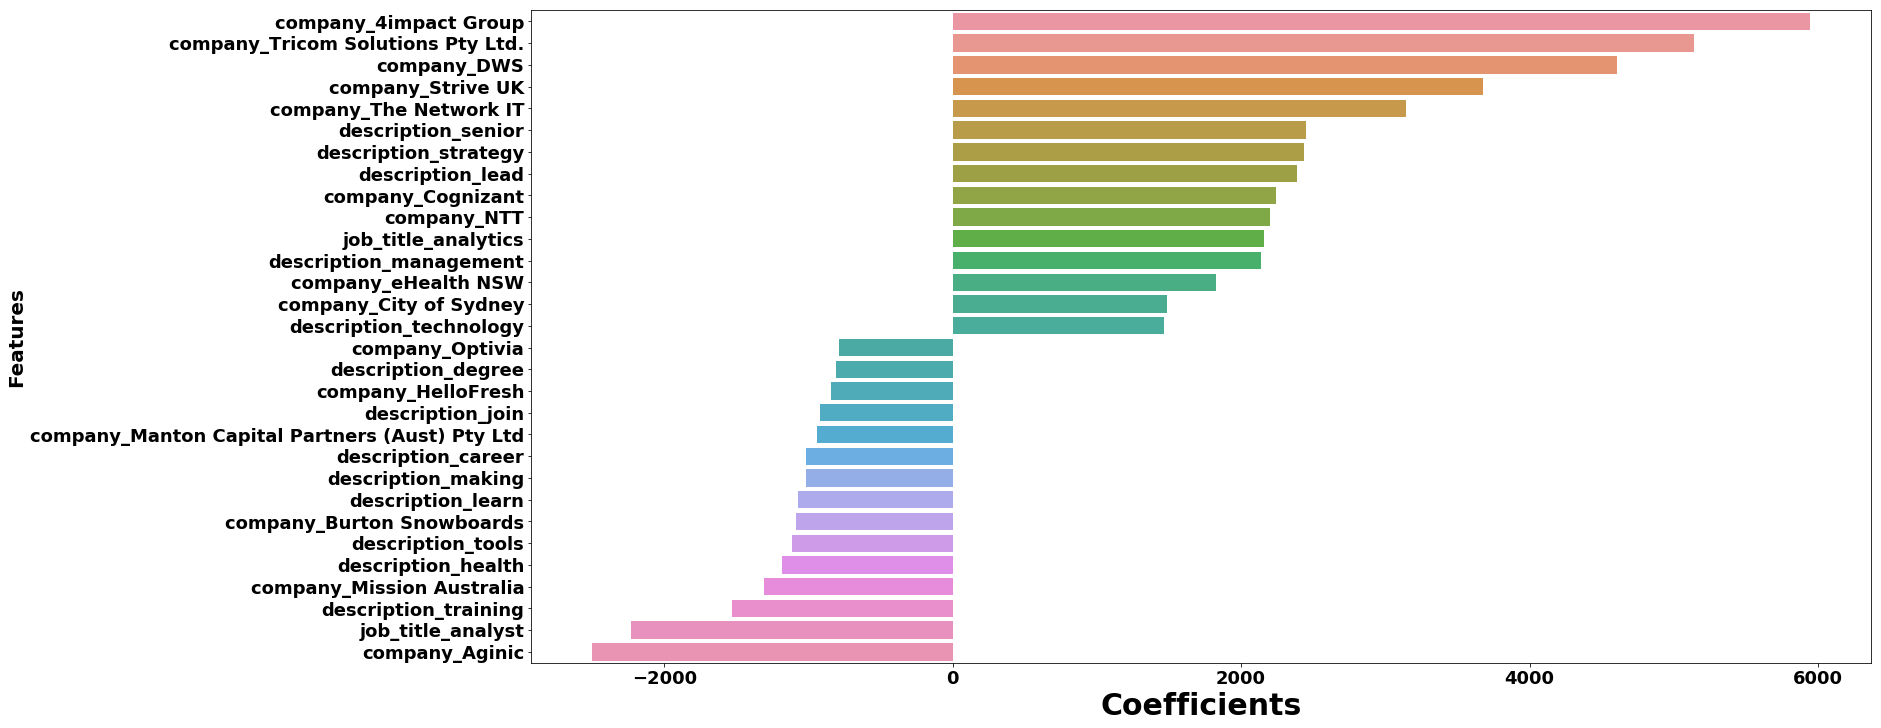

In [1646]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the most influential features
df =lasso_coefs.sort_values('coef',ascending=False)
df =pd.concat([df.head(15),df.tail(15)])

fig,ax = plt.subplots(1,1,figsize=(24,12))
sns.barplot(data=df,y= 'features',x = 'coef')
ax.set_xlabel("Coefficients",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_ylabel("Features",fontsize=20)

## Q1 Predicting Salary model 2: Logistic Regression
---
Method:
1. The target is the salary_range
2. Train test split
3. Vectorise job_title and description
4. pd.getdummies for categorical variables 
5. CV

In [1647]:
sr.head()

,search_title,job_type,salary_range,job_title,company,location,true_salary,description
0,data analyst,fulltime,50000-60000,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,NSW other,55000.0,Job Type:\n Amazing opportunity to work within...
1,data analyst,fulltime,50000-60000,Data Analyst,Aginic,QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
2,data analyst,fulltime,50000-60000,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,VIC Melbourne CBD,55000.0,Manton Capital is seeking a Customer Data Syst...
3,data analyst,fulltime,50000-60000,Data Analyst - experienced (Brisbane),Aginic,QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
4,data analyst,fulltime,60000-70000,Data Analyst,Westpac Group,NSW other,65000.0,How Will I Help? \n \nAs a Business Efficiency...


In [1648]:
y_train.index

Int64Index([642,  27, 350, 435, 352, 335, 525, 296, 134, 114,
            ...
            191, 619, 136, 245, 262, 407, 140, 318, 463, 348],
           dtype='int64', length=532)

In [1649]:
y_test.index

Int64Index([ 26, 662, 523, 183, 439, 431, 315, 251, 603, 108,
            ...
             82, 510, 263, 486, 205, 214, 532, 456, 286, 422],
           dtype='int64', length=134)

In [1670]:
y_lr_train = sr.loc[y_train.index,'salary_range']
y_lr_test = sr.loc[y_test.index,'salary_range']

In [1671]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Slightly better performance than knn
logr = LogisticRegression(max_iter=5000)
scores = cross_val_score(logr, Xs_train, y_lr_train, cv=5, n_jobs=-1)
print(scores)
print(np.mean(scores),np.std(scores))

C:\Users\draciel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.40186916 0.40186916 0.4245283  0.40566038 0.41509434]
0.40980426732498676 0.008807789448675009


In [1672]:
sr['salary_range'].value_counts()

90000-100000     210
100000-110000    129
80000-90000      111
110000-120000     82
120000-130000     36
70000-80000       33
130000-140000     15
140000-150000     12
60000-70000        9
170000-180000      9
50000-60000        7
150000-160000      6
160000-170000      3
190000-200000      2
180000-190000      2
Name: salary_range, dtype: int64

In [1673]:
# Baseline
sr['salary_range'].value_counts()[0]/len(sr['salary_range'])

0.3153153153153153

In [1674]:
# It is better than the baseline..
# Maybe it would perform better if we reduced the number of classes
logr.fit(Xs_train,y_lr_train)
print(logr.score(Xs_train, y_lr_train))
print(logr.score(Xs_test,y_lr_test))

0.9981203007518797
0.39552238805970147


## Q2 Predicting job titles model 1: Logistic Regression 
---
Method:
1. The target is the search_title
2. Train test split
3. Vectorise job_title and description
4. pd.getdummies for categorical variables 
5. CV

In [1675]:
sr.head()

,search_title,job_type,salary_range,job_title,company,location,true_salary,description
0,data analyst,fulltime,50000-60000,Junior Data Analyst & Logistics Co-ordinator,Burton Snowboards,NSW other,55000.0,Job Type:\n Amazing opportunity to work within...
1,data analyst,fulltime,50000-60000,Data Analyst,Aginic,QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
2,data analyst,fulltime,50000-60000,Customer Data Systems Analyst,Manton Capital Partners (Aust) Pty Ltd,VIC Melbourne CBD,55000.0,Manton Capital is seeking a Customer Data Syst...
3,data analyst,fulltime,50000-60000,Data Analyst - experienced (Brisbane),Aginic,QLD,55000.0,"At Aginic, a group of the country’s brightest ..."
4,data analyst,fulltime,60000-70000,Data Analyst,Westpac Group,NSW other,65000.0,How Will I Help? \n \nAs a Business Efficiency...


In [1676]:
y_lr_train = sr.loc[y_train.index,'search_title']
y_lr_test = sr.loc[y_test.index,'search_title']

In [1678]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logr = LogisticRegression(max_iter=5000)
scores = cross_val_score(logr, Xs_train, y_lr_train, cv=5, n_jobs=-1)
print(scores)
print(np.mean(scores),np.std(scores))

[0.85046729 0.90654206 0.9245283  0.86792453 0.88679245]
0.8872509257626522 0.02641403489134773


In [1680]:
sr['search_title'].value_counts()

business analyst    354
data analyst        142
data engineer       105
data scientist       65
Name: search_title, dtype: int64

In [1682]:
# Baseline
sr['search_title'].value_counts()[0]/len(sr['search_title'])

0.5315315315315315

In [1683]:
# We could also add salary 
logr.fit(Xs_train,y_lr_train)
print(logr.score(Xs_train, y_lr_train))
print(logr.score(Xs_test,y_lr_test))

0.9642857142857143
0.9104477611940298


In [1724]:
logr_coefs = pd.DataFrame(logr.coef_,columns=X_train.columns,index=['business analyst','data analyst','data engineer','data scientist']).T
logr_coefs.head()

,business analyst,data analyst,data engineer,data scientist
job_type_contract,-0.000062,0.054363,-0.010512,-0.043790
job_type_fulltime,-0.028576,-0.144522,0.114149,0.058950
job_type_parttime,0.026165,0.183422,-0.198542,-0.011045
job_type_permanent,0.018830,-0.020634,0.035328,-0.033524
job_type_temporary,0.012040,0.016134,-0.010345,-0.017829


In [1725]:
for i in logr_coefs.columns:
    logr_coefs['abs ' + i] = logr_coefs[i].apply(np.abs)

In [1730]:
logr_coefs.filter(regex='business').sort_values('abs business analyst', ascending=False).head(20)

,business analyst,abs business analyst
job_title_data,-1.081963,1.081963
job_title_business,0.985072,0.985072
job_title_analyst,0.282892,0.282892
description_python,-0.262316,0.262316
job_title_engineer,-0.245764,0.245764
description_analytics,-0.199513,0.199513
description_analyst,0.193310,0.193310
description_computer,-0.181849,0.181849
job_title_technical,0.176335,0.176335
description_sql,-0.165269,0.165269


In [1731]:
logr_coefs.filter(regex='data analyst').sort_values('abs data analyst', ascending=False).head(20)

,data analyst,abs data analyst
job_title_data,0.908789,0.908789
job_title_business,-0.623251,0.623251
job_title_analytics,0.601472,0.601472
job_title_analyst,0.600905,0.600905
job_title_engineer,-0.472787,0.472787
description_analytics,0.339056,0.339056
description_python,-0.236226,0.236226
description_reporting,0.216476,0.216476
job_title_scientist,-0.209893,0.209893
description_analysis,0.201601,0.201601


In [1732]:
logr_coefs.filter(regex='data engineer').sort_values('abs data engineer', ascending=False).head(20)

,data engineer,abs data engineer
job_title_engineer,0.994219,0.994219
job_title_analyst,-0.411889,0.411889
job_title_analytics,-0.258128,0.258128
description_engineering,0.233769,0.233769
company_Foxtel,-0.204883,0.204883
description_analyst,-0.198877,0.198877
job_type_parttime,-0.198542,0.198542
job_title_scientist,-0.198175,0.198175
job_title_business,-0.194626,0.194626
description_big,0.172705,0.172705


In [1733]:
logr_coefs.filter(regex='data scientist').sort_values('abs data scientist', ascending=False).head(20)

,data scientist,abs data scientist
job_title_scientist,0.512663,0.512663
job_title_analyst,-0.471907,0.471907
description_science,0.391525,0.391525
description_learning,0.389116,0.389116
description_python,0.333516,0.333516
job_title_engineer,-0.275667,0.275667
description_great,-0.220231,0.220231
company_Atlassian,0.210049,0.210049
job_title_analytics,-0.201905,0.201905
job_title_business,-0.167195,0.167195


## Q2 Predicting job titles model 2: Decision Tree
---
Method:
1. The target is the search_title
2. Train test split
3. Vectorise job_title and description
4. pd.getdummies for categorical variables 
5. CV

In [1734]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [1735]:
dtc = DecisionTreeClassifier()
dtc.fit(Xs_train,y_lr_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1739]:
dot_data = export_graphviz(dtc, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=['business analyst','data analyst','data engineer','data scientist'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

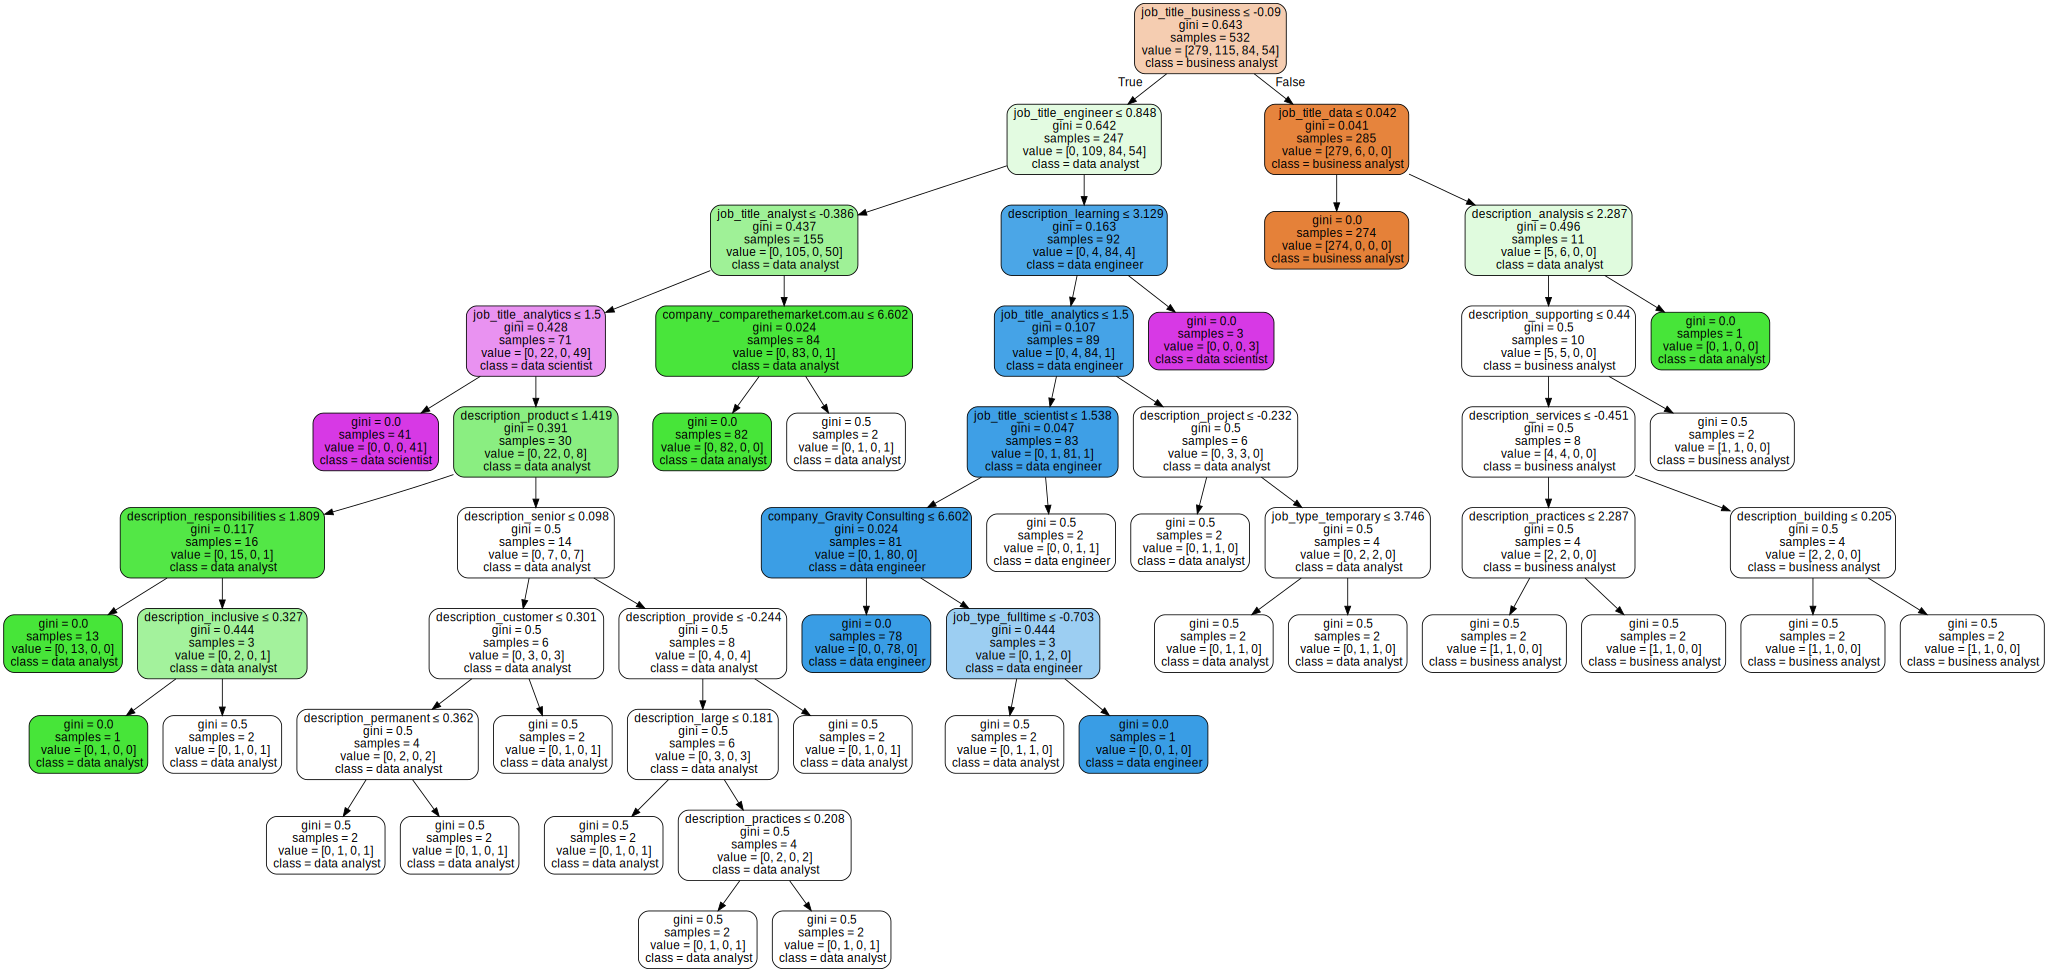

In [1740]:
graph = graphviz.Source(dot_data)  
graph  

In [1751]:
dtc.score(Xs_train,y_lr_train)

0.9642857142857143

In [1741]:
dtc.score(Xs_test,y_lr_test)

0.9402985074626866

In [1750]:
dtc_feature_importance = pd.DataFrame({'feature':X_train.columns,'importance':dtc.feature_importances_})

dtc_feature_importance.sort_values('importance',ascending=False).head(30)

,feature,importance
308,job_title_business,0.531775
310,job_title_engineer,0.234704
306,job_title_analyst,0.109569
307,job_title_analytics,0.065722
309,job_title_data,0.019478
421,description_learning,0.016802
457,description_product,0.008847
288,company_comparethemarket.com.au,0.003022
312,job_title_scientist,0.002948
122,company_Gravity Consulting,0.001987
